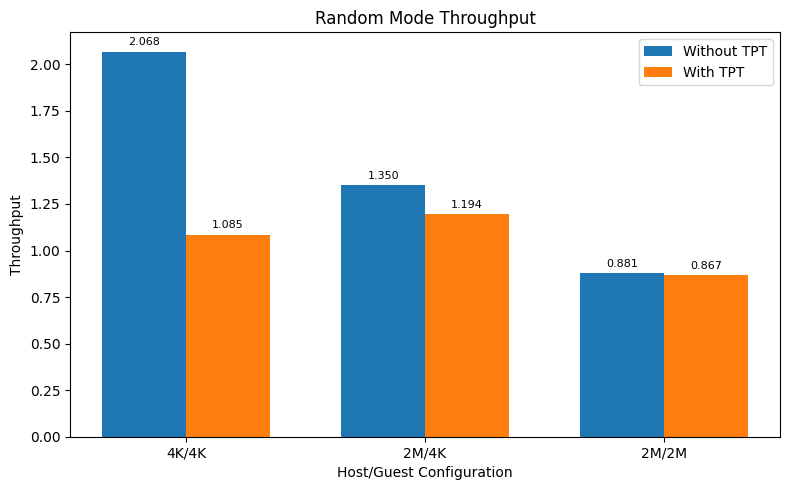

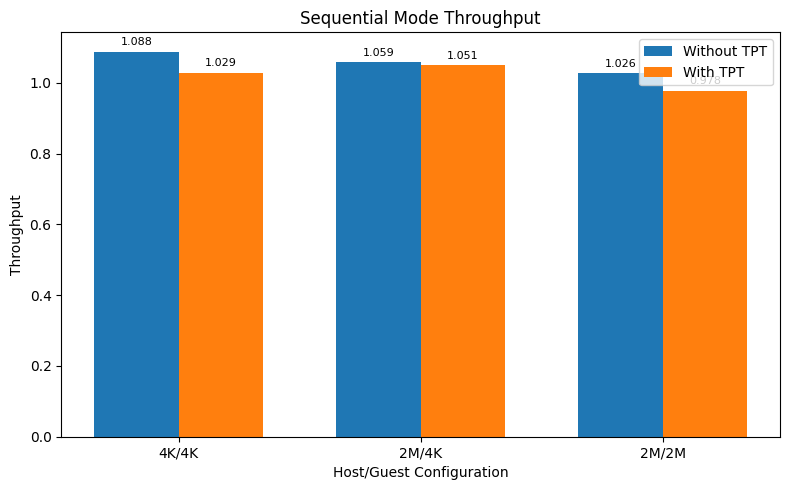

In [13]:
# This is when sysbench was limited with time 
# Throughput			
# Host 	Guest 	mode 	Without TPT 	With TPT 		
# 4K	4K	     rnd 	158.685	        302.41		
# 2M	4K 	     rnd 	243.09	        274.843		
# 2M 	2M 	     rnd    372.582         378.718	  

           	
# 4K 	4K 	     seq 	8689.182	    9191.347		
# 2M 	4K 	     seq 	8926.269	    8997.371	
# 2M 	2M	     seq 	9213.024	    9668.146	


# https://wiki.gentoo.org/wiki/Sysbench - Notes for the sysbench memory test	

import numpy as np
import matplotlib.pyplot as plt

RANDOM_NATIVE = 328.203
SEQUENTIAL_NATIVE = 9454.887

def plot_throughput(data_without, data_with, mode, group_labels, fmt='.1f'):
    n_groups = len(group_labels)
    index = np.arange(n_groups)
    bar_width = 0.35

    plt.figure(figsize=(8, 5))
    bars1 = plt.bar(index - bar_width/2, data_without, bar_width, label='Without TPT', color='#1f77b4')
    bars2 = plt.bar(index + bar_width/2, data_with, bar_width, label='With TPT', color='#ff7f0e')

    plt.xlabel('Host/Guest Configuration')
    plt.ylabel('Throughput')
    plt.title(f'{mode} Mode Throughput')
    plt.xticks(index, group_labels)
    plt.legend()

    # Function to add labels with specified format
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{height:{fmt}}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

    add_labels(bars1)
    add_labels(bars2)

    plt.tight_layout()
    plt.show()

# Data for random mode (values in IOPS)
random_without = [158.685, 243.09, 372.582]
random_with = [302.41, 274.843, 378.718]
group_labels = ['4K/4K', '2M/4K', '2M/2M']
normilized_random_without = [RANDOM_NATIVE / x for x in random_without]
normilized_random_with = [RANDOM_NATIVE / x for x in random_with]
plot_throughput(normilized_random_without, normilized_random_with, 'Random', group_labels, fmt='.3f')

# Data for sequential mode (values in IOPS)
sequential_without = [8689.182, 8926.269, 9213.024]
sequential_with = [9191.347, 8997.371, 9668.146]
normilized_sequential_without = [SEQUENTIAL_NATIVE / x for x in sequential_without]
normilized_sequential_with = [SEQUENTIAL_NATIVE / x for x in sequential_with]
plot_throughput(normilized_sequential_without, normilized_sequential_with, 'Sequential', group_labels, fmt='.3f')





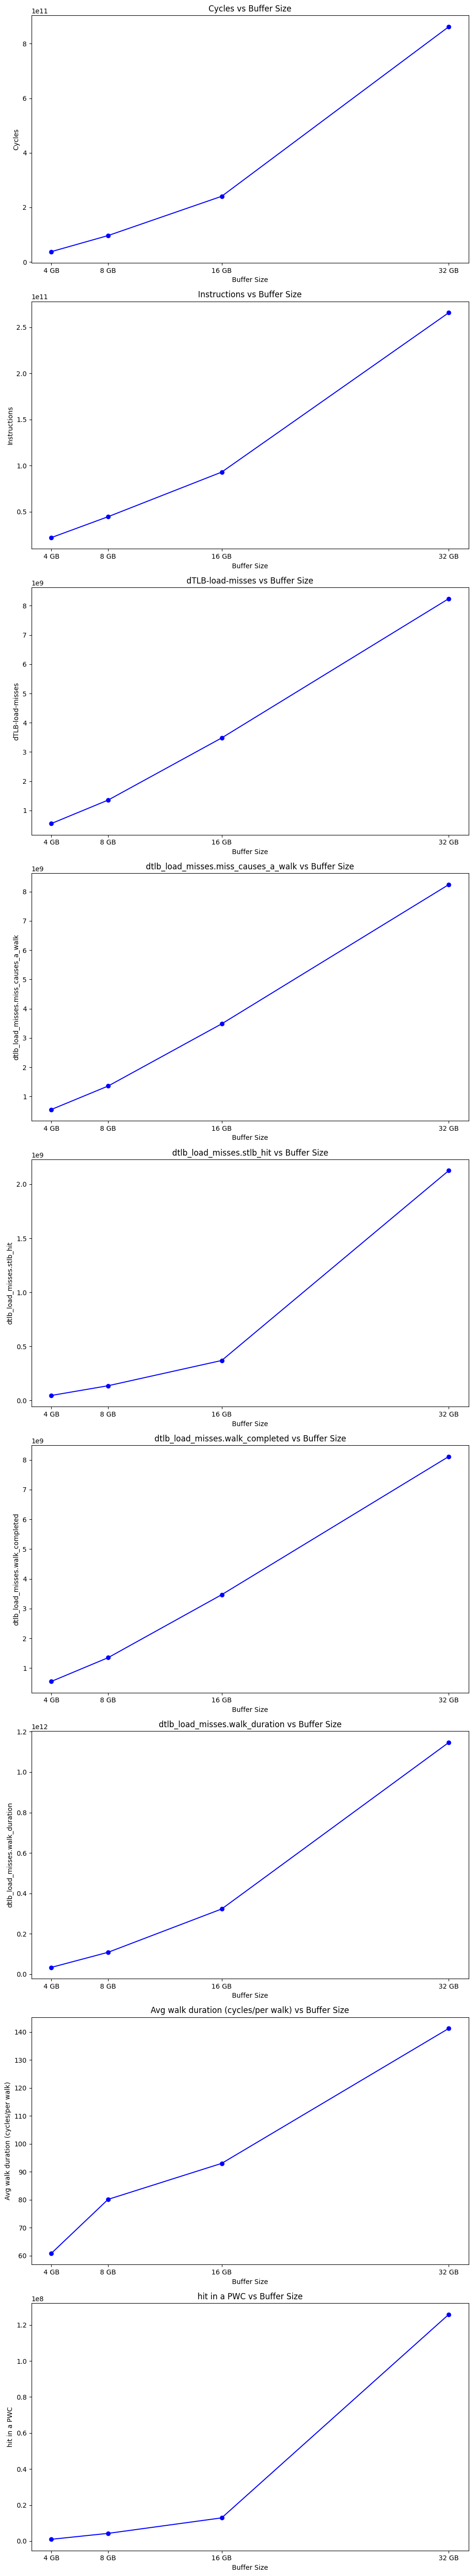

In [14]:
# this is for running the tests in with the limited with time 
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with the given data, now including buffer size 32
data = {
    'BufferSize': [4, 8, 16, 32],
    'Cycles': [37713025373, 96646300455, 240617272353, 862440428362],
    'Instructions': [21946153557, 44598387796, 92924982439, 265713601279],
    'dTLB-load-misses': [554872737, 1356797869, 3480980765, 8242190068],
    'dtlb_load_misses.miss_causes_a_walk': [555189684, 1356945175, 3482275701, 8241662740],
    'dtlb_load_misses.stlb_hit': [46173927, 136174471, 369784943, 2127326151],
    'dtlb_load_misses.walk_completed': [554191069, 1352661732, 3469385285, 8115787753],
    'dtlb_load_misses.walk_duration': [33718613313, 108413752861, 322744655211, 1146881302734],
    'Avg walk duration (cycles/per walk)': [60.84293883, 80.14845863, 93.02646685, 141.3148468],
    'hit in a PWC': [998615, 4283443, 12890416, 125874987],
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Set the 'BufferSize' column as the index
df.set_index('BufferSize', inplace=True)

# Create a list of metrics to plot
metrics = df.columns
buffer_labels = [f"{size} GB" for size in df.index]

# Create individual plots for each metric
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 6 * len(metrics)))

# If there's only one plot, make sure axes is not a 2D array
if len(metrics) == 1:
    axes = [axes]

for ax, metric in zip(axes, metrics):
    df[metric].plot(ax=ax, marker='o', linestyle='-', color='b')
    ax.set_xlabel('Buffer Size')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} vs Buffer Size')
    ax.set_xticks(df.index)
    ax.set_xticklabels(buffer_labels)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()


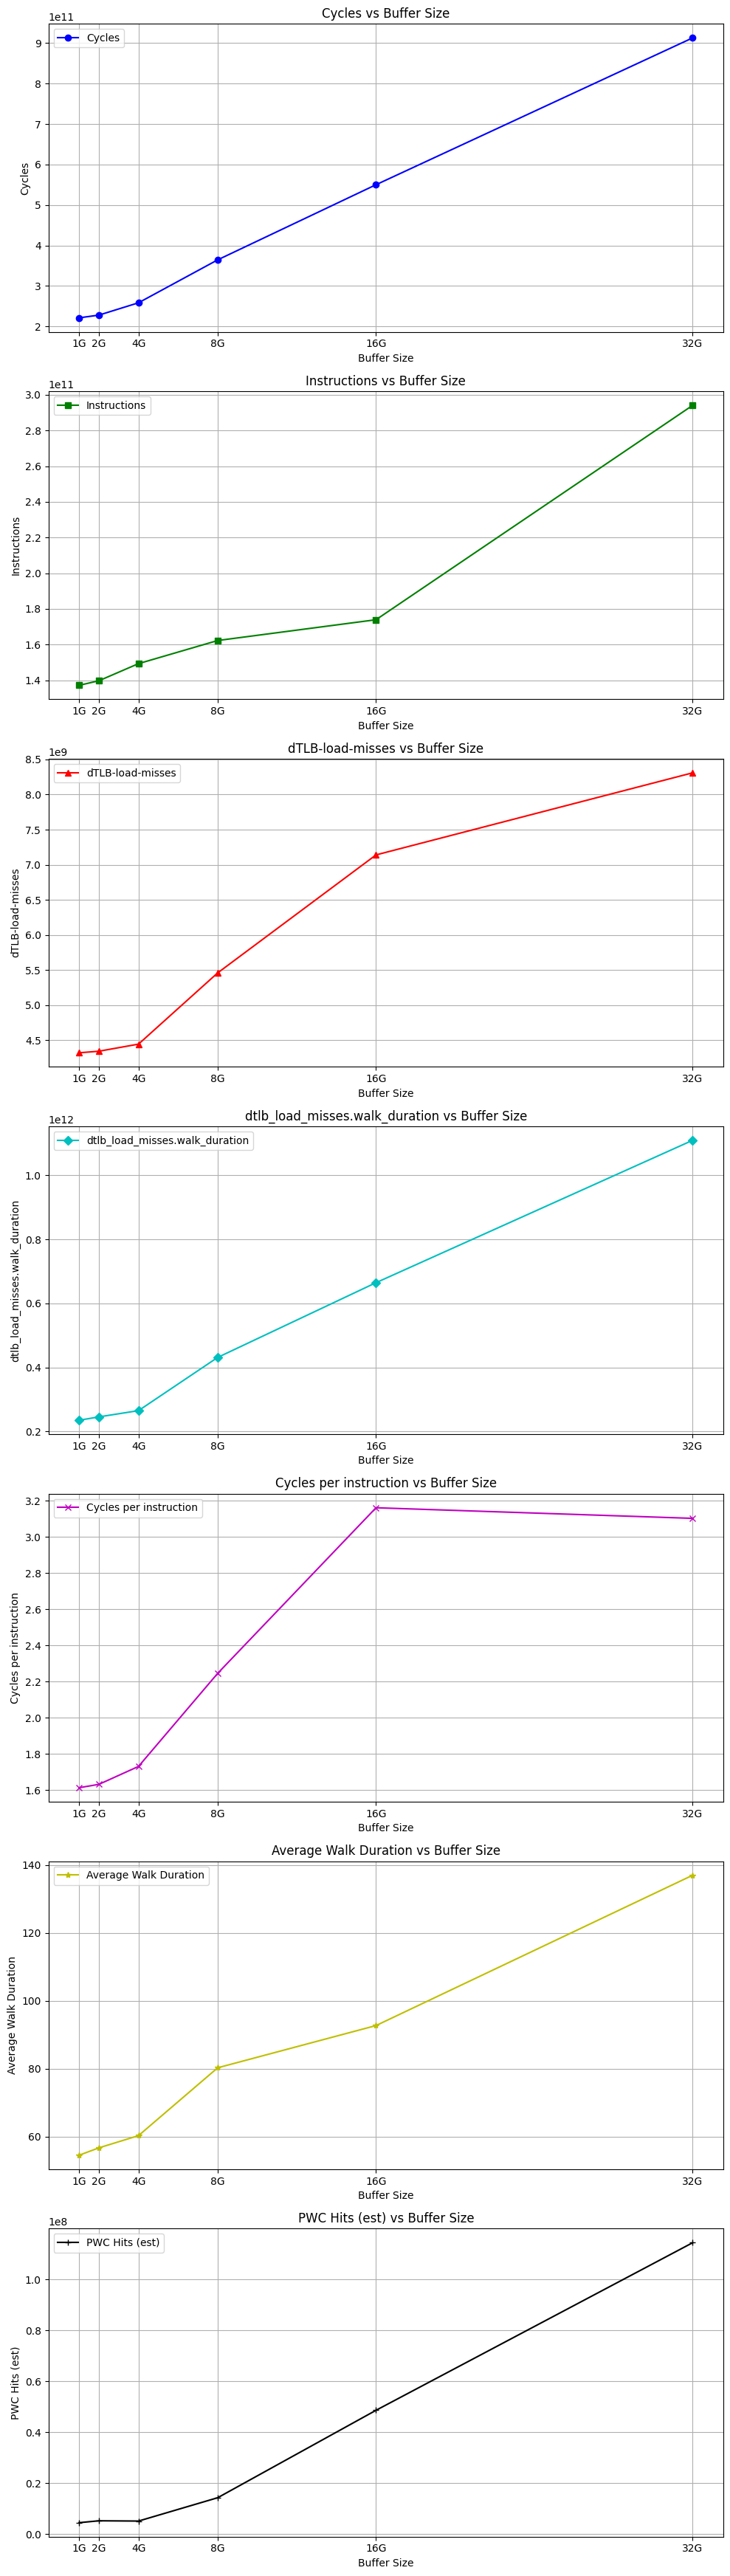

In [15]:
# This is running the buffer test with --time = 0 explecitly set in sysbench 
# various buffer sizes in the host 

import matplotlib.pyplot as plt
import pandas as pd

# Updated full dataset
data = {
    'BufferSize': [1, 2, 4, 8, 16, 32],
    'Cycles': [221234815802, 227998269269, 258437982755, 364458304277, 550039185092, 912763679945],
    'Instructions': [137187830036, 139751224994, 149336591817, 162295945232, 173952578580, 294117657652],
    'dTLB-load-misses': [4318195319, 4340523334, 4441785285, 5457412244, 7139757142, 8310290514],
    'dtlb_load_misses.miss_causes_a_walk': [4318679689, 4340430899, 4405211266, 5388448300, 7217869168, 8211362356],
    'dtlb_load_misses.stlb_hit': [105479507, 137527626, 121680939, 289005879, 953742789, 1921976911],
    'dtlb_load_misses.walk_completed': [4314150637, 4335160794, 4400046706, 5374130475, 7169247787, 8096988994],
    'dtlb_load_misses.walk_duration': [235240781486, 245789108605, 265289136106, 431358368054, 664576252440, 1108958080546],
}

# Create DataFrame
df = pd.DataFrame(data)

# Derived metrics
df['Cycles per instruction'] = df['Cycles'] / df['Instructions']
df['Average Walk Duration'] = df['dtlb_load_misses.walk_duration'] / df['dtlb_load_misses.walk_completed']
df['PWC Hits (est)'] = df['dtlb_load_misses.miss_causes_a_walk'] - df['dtlb_load_misses.walk_completed']

# Set BufferSize as index
df.set_index('BufferSize', inplace=True)
buffer_labels = [f"{size}G" for size in df.index]

# Metrics to plot
metrics = [
    'Cycles', 'Instructions', 'dTLB-load-misses',
    'dtlb_load_misses.walk_duration', 'Cycles per instruction', 'Average Walk Duration', 'PWC Hits (est)'
]

# Plotting
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 5 * len(metrics)))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 's', '^', 'D', 'x', '*', '+']

for i, (ax, metric) in enumerate(zip(axes, metrics)):
    df[metric].plot(
        ax=ax,
        marker=markers[i % len(markers)],
        linestyle='-',
        color=colors[i % len(colors)],
        label=metric
    )
    ax.set_xlabel('Buffer Size')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} vs Buffer Size')
    ax.set_xticks(df.index)
    ax.set_xticklabels(buffer_labels)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


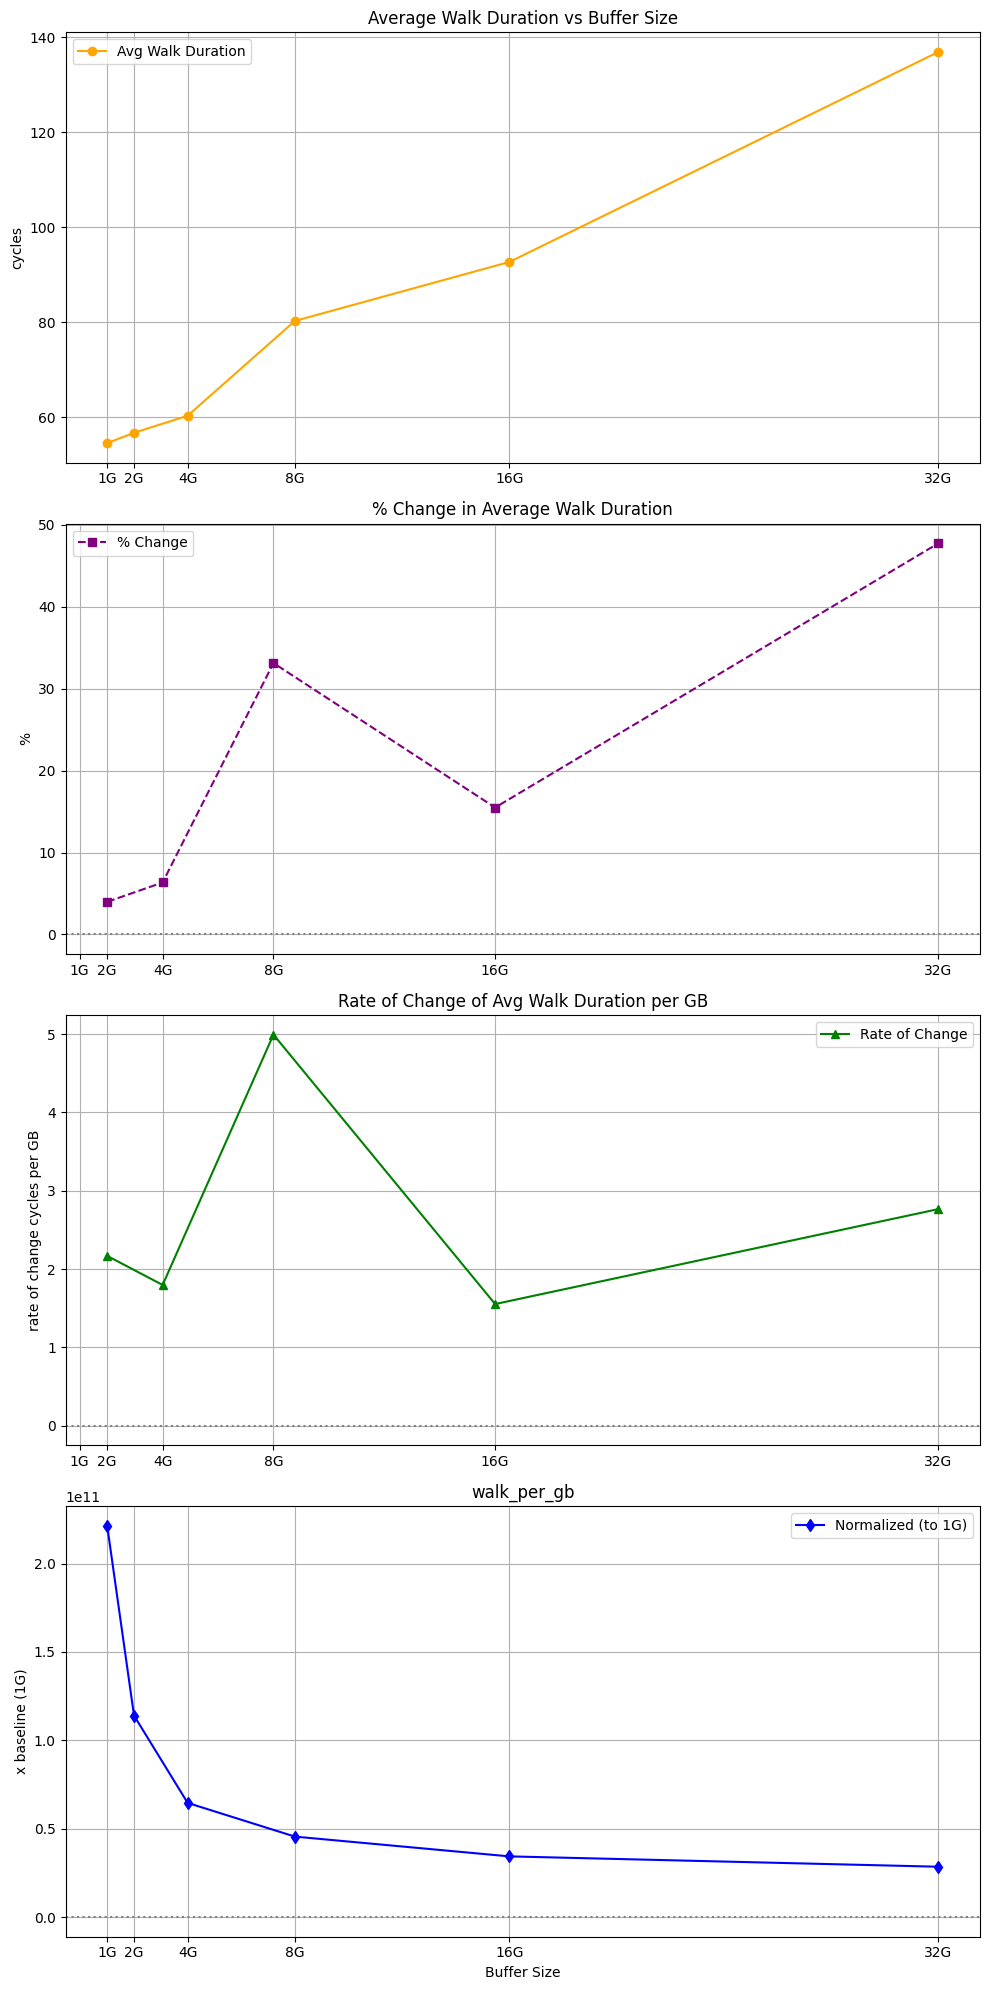

            Average Walk Duration  Normalized Walk Duration  \
BufferSize                                                    
1                       54.527716                  1.000000   
2                       56.696653                  1.039777   
4                       60.292345                  1.105719   
8                       80.265704                  1.472017   
16                      92.698184                  1.700020   
32                     136.959317                  2.511738   

            % Change Avg Walk Duration  Rate of Change (cycles per GB)  
BufferSize                                                              
1                                  NaN                             NaN  
2                             3.977678                        2.168937  
4                             6.341983                        1.797846  
8                            33.127520                        4.993340  
16                           15.489156                   

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Dataset
data = {
    'BufferSize': [1, 2, 4, 8, 16, 32],
    'Cycles': [221234815802, 227998269269, 258437982755, 364458304277, 550039185092, 912763679945],
    'Instructions': [137187830036, 139751224994, 149336591817, 162295945232, 173952578580, 294117657652],
    'dTLB-load-misses': [4318195319, 4340523334, 4441785285, 5457412244, 7139757142, 8310290514],
    'dtlb_load_misses.miss_causes_a_walk': [4318679689, 4340430899, 4405211266, 5388448300, 7217869168, 8211362356],
    'dtlb_load_misses.stlb_hit': [105479507, 137527626, 121680939, 289005879, 953742789, 1921976911],
    'dtlb_load_misses.walk_completed': [4314150637, 4335160794, 4400046706, 5374130475, 7169247787, 8096988994],
    'dtlb_load_misses.walk_duration': [235240781486, 245789108605, 265289136106, 431358368054, 664576252440, 1108958080546],
}

# Create DataFrame
df = pd.DataFrame(data)

# Derived metrics
df['Average Walk Duration'] = df['dtlb_load_misses.walk_duration'] / df['dtlb_load_misses.walk_completed']

df["walk_per_gb"] = df['Cycles'] / df['BufferSize']
df['% Change Avg Walk Duration'] = df['Average Walk Duration'].pct_change() * 100
df['Rate of Change (cycles per GB)'] = df['Average Walk Duration'].diff() / df['BufferSize'].diff()

# Normalize to 1G
df['Normalized Walk Duration'] = df['Average Walk Duration'] / df['Average Walk Duration'].iloc[0]

# Set BufferSize as index
df.set_index('BufferSize', inplace=True)
buffer_labels = [f"{size}G" for size in df.index]

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# 1. Average Walk Duration
axs[0].plot(df.index, df['Average Walk Duration'], marker='o', color='orange', label='Avg Walk Duration')
axs[0].set_title('Average Walk Duration vs Buffer Size')
axs[0].set_ylabel('cycles')
axs[0].set_xticks(df.index)
axs[0].set_xticklabels(buffer_labels)
axs[0].grid(True)
axs[0].legend()

# 2. Percentage Change
axs[1].plot(df.index, df['% Change Avg Walk Duration'], marker='s', linestyle='--', color='purple', label='% Change')
axs[1].set_title('% Change in Average Walk Duration')
axs[1].set_ylabel('%')
axs[1].set_xticks(df.index)
axs[1].set_xticklabels(buffer_labels)
axs[1].axhline(0, color='gray', linestyle='dotted')
axs[1].grid(True)
axs[1].legend()

# 3. Rate of Change
axs[2].plot(df.index, df['Rate of Change (cycles per GB)'], marker='^', linestyle='-', color='green', label='Rate of Change')
axs[2].set_title('Rate of Change of Avg Walk Duration per GB')
axs[2].set_ylabel('rate of change cycles per GB')
axs[2].set_xticks(df.index)
axs[2].set_xticklabels(buffer_labels)
axs[2].axhline(0, color='gray', linestyle='dotted')
axs[2].grid(True)
axs[2].legend()

# 4. Normalized Walk Duration
axs[3].plot(df.index, df['walk_per_gb'], marker='d', color='blue', label='Normalized (to 1G)')
axs[3].set_title('walk_per_gb')
axs[3].set_ylabel('x baseline (1G)')
axs[3].set_xlabel('Buffer Size')
axs[3].set_xticks(df.index)
axs[3].set_xticklabels(buffer_labels)
axs[3].axhline(1.0, color='gray', linestyle='dotted')
axs[3].grid(True)
axs[3].legend()



plt.tight_layout()
plt.show()

# Print for review
print(df[['Average Walk Duration', 'Normalized Walk Duration', '% Change Avg Walk Duration', 'Rate of Change (cycles per GB)']])


Buffer size analysis 
Quantifyable measures -> percentage change; rate of change 
normalising the data -> ?? 




In [1]:
import pandas as pd

# Define the updated data
all_data = [
    {
        'config': '4k/4k rnd 8G 32G no TPT',
        'cycles': 724977172035,
        'Instr': 133038643125,
        'dTLB_load_misses': 19637948656,
        'miss_causes_walk': 19642296064,
        'stlb_hit': 9297552,
        'walk_completed': 8297819470,
        'walk_duration': 1246147511462,
        'throughput': '106.58 MiB/sec',
        'avg_walk_duration': 150.1777082
    },
    {
        'config': '4k/4k rnd 8G 32G TPT',
        'cycles': 323167725820,
        'Instr': 133039979802,
        'dTLB_load_misses': 5568191537,
        'miss_causes_walk': 5569155597,
        'stlb_hit': 9866178,
        'walk_completed': 5569161836,
        'walk_duration': 463791763620,
        'throughput': '238.62 MiB/sec',
        'avg_walk_duration': 83.2785574
    },
    {
        'config': '4k/4k seq 8G 32G no TPT',
        'cycles': 10724909613,
        'Instr': 5910155305,
        'dTLB_load_misses': 14848622,
        'miss_causes_walk': 14840760,
        'stlb_hit': 7135589,
        'walk_completed': 5643675,
        'walk_duration': 242821656,
        'throughput': '10415.65 MiB/sec',
        'avg_walk_duration': 43.02544991
    },
    {
        'config': '4k/4k seq 8G 32G TPT',
        'cycles': 10217901737,
        'Instr': 5908908953,
        'dTLB_load_misses': 2263510,
        'miss_causes_walk': 2268494,
        'stlb_hit': 7148571,
        'walk_completed': 2249236,
        'walk_duration': 137676448,
        'throughput': '10769.38 MiB/sec',
        'avg_walk_duration': 61.21031675
    }
]

# Create a DataFrame
df = pd.DataFrame(all_data)

df['throughput'] = df['throughput'].str.replace(' MiB/sec', '').astype(float)

def compute_metrics(index):
    data = all_data[index]
    metrics = {}

    metrics['config'] = data['config']
    metrics['cycles'] = data['cycles']
    metrics['Instr'] = data['Instr']
    metrics['CPI'] = data['cycles'] / data['Instr']
    metrics['MPKI'] = (data['dTLB_load_misses'] / data['Instr']) * 1000
    metrics['Avg_walk_duration'] = data['walk_duration'] / data['walk_completed']
    metrics['Walks_per_instr'] = data['walk_completed'] / data['Instr']
    metrics['percentage_cycles_page_walk'] = (data['walk_duration'] / data['cycles']) * 100

    print(f"\nMetrics for: {data['config']}")
    for key, value in metrics.items():
        if key != 'config':
            print(f"{key}: {value:.2f}")
    

compute_metrics(0) 
compute_metrics(1)

print("-" * 50)

compute_metrics(2)
compute_metrics(3)
print("-" * 50)

# note: why is there a difference in the TLB misses 


Metrics for: 4k/4k rnd 8G 32G no TPT
cycles: 724977172035.00
Instr: 133038643125.00
CPI: 5.45
MPKI: 147.61
Avg_walk_duration: 150.18
Walks_per_instr: 0.06
percentage_cycles_page_walk: 171.89

Metrics for: 4k/4k rnd 8G 32G TPT
cycles: 323167725820.00
Instr: 133039979802.00
CPI: 2.43
MPKI: 41.85
Avg_walk_duration: 83.28
Walks_per_instr: 0.04
percentage_cycles_page_walk: 143.51
--------------------------------------------------

Metrics for: 4k/4k seq 8G 32G no TPT
cycles: 10724909613.00
Instr: 5910155305.00
CPI: 1.81
MPKI: 2.51
Avg_walk_duration: 43.03
Walks_per_instr: 0.00
percentage_cycles_page_walk: 2.26

Metrics for: 4k/4k seq 8G 32G TPT
cycles: 10217901737.00
Instr: 5908908953.00
CPI: 1.73
MPKI: 0.38
Avg_walk_duration: 61.21
Walks_per_instr: 0.00
percentage_cycles_page_walk: 1.35
--------------------------------------------------



TPT vs Non-TPT 

what are quantitative ways we can measure change: 
for single measurements -> percentage change, rate of change, 
for a range of measurements -> t-test (statistical significance)

what do I want to normalise against: 


what is the hypothesis that I would like to test: 
 



Problem: how to consider/justify the case that page_walk_cycles > cycles 

The idea is to build a predictor 

first look at the execution time 

Pick the buffer size of 8G / 1G (small one) ->  if the execution time is above a certain threshold then narrow down that this is becuase of the address translation overhead (using some metircs) -> and make a decision to enable TPT or not for this case 



In [11]:
import pandas as pd

# Load data
df = pd.read_csv('sysbench_memory_results_no_tpt.csv') 

# cycles per instruction
df['CPI'] = df['cycles'] / df['instructions']
# Misses per K instruction (load)
df['MPKI_load'] = (df['dTLB-load-misses'] / df['instructions']) * 1000

# Misses per K instruction (store)
df['MPKI_store'] = (df['dTLB-store-misses'] / df['instructions']) * 1000

print(df[['simplified_command', 'CPI', 'MPKI_load', 'MPKI_store']])

  simplified_command        CPI   MPKI_load  MPKI_store
0      8_32_read_seq   1.923760    4.601420    4.863004
1      8_32_read_rnd   5.036664  148.709941    0.236113
2     8_32_write_seq   0.631240    0.537734    2.345736
3     8_32_write_rnd   9.701135    0.124148  146.370869
4      1_32_read_seq   2.061651    1.790208    0.461997
5      1_32_read_rnd   2.516933   95.074216    0.025886
6     1_32_write_seq   0.498702    0.071934    1.083686
7     1_32_write_rnd  11.177254    0.046002   98.644752
